In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

This notebook demonstrates simple aggregation of datasets following covid and swine influenza spreads, as well as factors such as healthcare access and pollution, and see if there is a correlation between the spreads of these viruses and these living factors

In [2]:
covid_df = pd.read_csv('./data/covid_archive/country_wise_latest.csv');
h1n1_df = pd.read_csv('./h1n1_archive/data.csv');
city_country_relation = pd.read_csv('./quality_of_life_archive/cities.csv');
city_df = pd.read_csv('./quality_of_life_archive/movehubqualityoflife.csv');

In [3]:
print(covid_df.columns)
print(h1n1_df.columns)
print(city_country_relation.columns)
print(city_df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
Index(['Date', 'Country', 'Cumulative no. of cases',
       'Cumulative no. of deaths', 'Link'],
      dtype='object')
Index(['City', 'Country'], dtype='object')
Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')


In [4]:
city_2_country = city_country_relation.set_index('City').to_dict()
city_2_country = city_2_country['Country']
print(city_2_country)

{'Oakland': 'United States', 'Oakville': 'Canada', 'Oaxaca de Juárez': 'Mexico', 'Oberhausen': 'Germany', 'Obihiro': 'Japan', 'Obninsk': 'Russia', 'Oceanside': 'United States', 'Odawara': 'Japan', 'Odense': 'Denmark', 'Odessa': 'Ukraine', 'Odintsovo': 'Russia', 'Offenbach am Main': 'Germany', 'Ōgaki': 'Japan', 'Ogbomosho': 'Nigeria', 'Ōita': 'Japan', 'Okara': 'Pakistan', 'Okayama': 'Japan', 'Okazaki': 'Japan', 'Okene': 'Nigeria', 'Okinawa': 'Japan', 'Oklahoma City': 'United States', 'Oktyabrsky': 'Russia', 'Oldenburg': 'Germany', 'Oldham': 'United Kingdom', 'Olinda': 'Brazil', 'Olmaliq': 'Uzbekistan', 'Olomouc': 'Czech Republic', 'Olongapo': 'Philippines', 'Olsztyn': 'Poland', 'Omaha': 'United States', 'Omdurman': 'Sudan', 'Omsk': 'Russia', 'Ōmuta': 'Japan', 'Ongole': 'India', 'Onitsha': 'Nigeria', 'Ontario': 'United States', 'Opole': 'Poland', 'Or Yehuda': 'Israel', 'Oradea': 'Romania', 'Oral': 'Kazakhstan', 'Oran': 'Algeria', 'Orange': 'United States', 'Ordos City': 'China', 'Ordu': 

The data pertainting to pollution and health care ratings are broken down by a city-to-city basis. As seen here, to make associations between cities and countries, as we are doing country level aggregations, we need this dictionary that matches up cities with their countries. This acts as a sort of assocation table

In [5]:
# ['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
#        'Quality of Life', 'Crime Rating']
country_covid_cases = {}
country_h1n1_cases = {}
country_healthcare_rating = {}
country_pollution_rating = {}
country_qualityOfLife_rating = {}
country_Movehub_rating = {}
country_Purachase_power = {}
country_Crime_rating = {}
city_country_ct = {} # For the quality of life measurements, broken down by city but trying to aggregate by country

The dictionaries above will store the number of cases for covid, h1n1, average healthcare ratings, and average pollution ratings for each country

In [6]:
for index,row in covid_df.iterrows():
    country_covid_cases[row["Country/Region"]] = int(row["Confirmed"])

for index,row in h1n1_df.iterrows():
    if country_h1n1_cases.get(row["Country"]) == None:
        country_h1n1_cases[row["Country"]] = row['Cumulative no. of cases']
    elif row['Cumulative no. of cases'] > country_h1n1_cases[row["Country"]]:
        country_h1n1_cases[row["Country"]] = row['Cumulative no. of cases']

print(city_country_ct)

{}


In [7]:
for index, row in city_df.iterrows():
    
    #Edge case differentiation, as some city names are stored different in the association table
    k = row["City"]
    if k == "Philadelphia":
        k = "Philadelphia, Pennsylvania"
    elif k == "Rio De Janeiro":
        k = "Rio de Janeiro"
    elif k == "Sao Paulo":
        k = "São Paulo"
    elif k == "Miami":
        k = "Miami, Florida"
    elif city_2_country.get(k) == None:
        continue
    
    #below is a moving average calculation
    country = city_2_country[k]
    if city_country_ct.get(country) == None or city_country_ct[country] == 0:
        city_country_ct[country] = 1
    else:
        city_country_ct[country] = city_country_ct[country] + 1
    
    if city_country_ct[country] == 1:
#         ['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
#        'Quality of Life', 'Crime Rating']
        country_healthcare_rating[country] = row['Health Care']
        country_pollution_rating[country] = row['Pollution']
        country_qualityOfLife_rating[country] = row['Quality of Life']
        country_Movehub_rating[country] = row['Movehub Rating']
        country_Purachase_power[country] = row['Purchase Power']
        country_Crime_rating[country] = row['Crime Rating']
    else:
        prev_res_h = (city_country_ct[country] - 1) * (country_healthcare_rating[country])
        prev_res_p = (city_country_ct[country] - 1) * (country_pollution_rating[country])
        prev_res_q = (city_country_ct[country] - 1) * (country_qualityOfLife_rating[country])
        prev_res_m = (city_country_ct[country] - 1) * (country_Movehub_rating[country])
        prev_res_pp = (city_country_ct[country] - 1) * (country_Purachase_power[country])
        prev_res_c = (city_country_ct[country] - 1) * (country_Crime_rating[country])
        
        curr_res_h = prev_res_h + row['Health Care']
        curr_res_p = prev_res_p + row['Pollution']
        curr_res_q = prev_res_q + row['Quality of Life']
        curr_res_m = prev_res_m + row['Movehub Rating']
        curr_res_pp = prev_res_pp + row['Purchase Power']
        curr_res_c = prev_res_c + row['Crime Rating']
        
        country_healthcare_rating[country] = curr_res_h / city_country_ct[country]
        country_pollution_rating[country] = curr_res_p / city_country_ct[country]
        country_qualityOfLife_rating[country] = curr_res_q / city_country_ct[country]
        country_Movehub_rating[country] = curr_res_m / city_country_ct[country]
        country_Purachase_power[country] = curr_res_pp / city_country_ct[country]
        country_Crime_rating[country] = curr_res_c / city_country_ct[country]
    
        
print(country_healthcare_rating)
print(country_pollution_rating)

{'Venezuela': 58.254999999999995, 'South Africa': 67.58666666666666, 'Brazil': 56.370000000000005, 'Senegal': 77.29, 'Mexico': 61.76, 'United States': 65.64347826086956, 'India': 61.90083333333334, 'Pakistan': 54.79999999999999, 'Netherlands': 67.24000000000001, 'Kenya': 61.34, 'Malaysia': 56.21, 'Philippines': 80.56, 'Peru': 53.7, 'Italy': 62.89000000000001, 'Dominican Republic': 62.5, 'Nigeria': 62.04, 'United Kingdom': 71.40846153846152, 'Argentina': 79.17, 'Bangladesh': 20.83, 'Russia': 44.32, 'Switzerland': 73.49, 'Ukraine': 35.769999999999996, 'Iran': 43.98, 'Belgium': 81.35, 'France': 76.88, 'Vietnam': 20.83, 'New Zealand': 76.47666666666666, 'Uruguay': 59.72, 'Canada': 73.286, 'Australia': 77.88125, 'Oman': 62.5, 'Botswana': 27.78, 'Sri Lanka': 75.0, 'Egypt': 56.48, 'Ecuador': 32.41, 'Ireland': 52.72, 'Indonesia': 38.33, 'Bulgaria': 50.83, 'Albania': 44.44, 'China': 68.8, 'Mongolia': 43.06, 'Jordan': 75.37, 'Israel': 76.045, 'Colombia': 73.89, 'Turkey': 59.55, 'Spain': 69.19666

In [8]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# plt.figure(figsize=(100,100))
# plt.xticks(size = 25)
# plt.yticks(size = 60)
# plt.plot(list(country_pollution_rating.keys()), list(country_healthcare_rating.values()),'o', markersize=20)


In [9]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# plt.figure(figsize=(100,100))
# plt.xticks(size = 25)
# plt.yticks(size = 60)
# plt.plot(list(country_healthcare_rating.keys()), list(country_healthcare_rating.values()),'black')


In [8]:
highest_covid = sorted(country_covid_cases.items(), key=lambda x: x[1], reverse=True)
highest_h1n1 = sorted(country_h1n1_cases.items(), key=lambda x: x[1], reverse=True)
lowest_healthcare = sorted(country_healthcare_rating.items(), key=lambda x: x[1])
highest_pollution = sorted(country_pollution_rating.items(), key=lambda x: x[1], reverse=True)

In [9]:
for i in country_covid_cases.keys():
    if i not in(country_healthcare_rating.keys()):
        country_healthcare_rating[i]=0
        
        
for i in (country_healthcare_rating.keys()):
    if i not in(country_covid_cases.keys()):
        country_covid_cases[i]=0

    
print(len(country_healthcare_rating.keys()))
print(len(country_covid_cases.keys()))

191
191


ValueError: could not convert string to float: 'Pakistan'

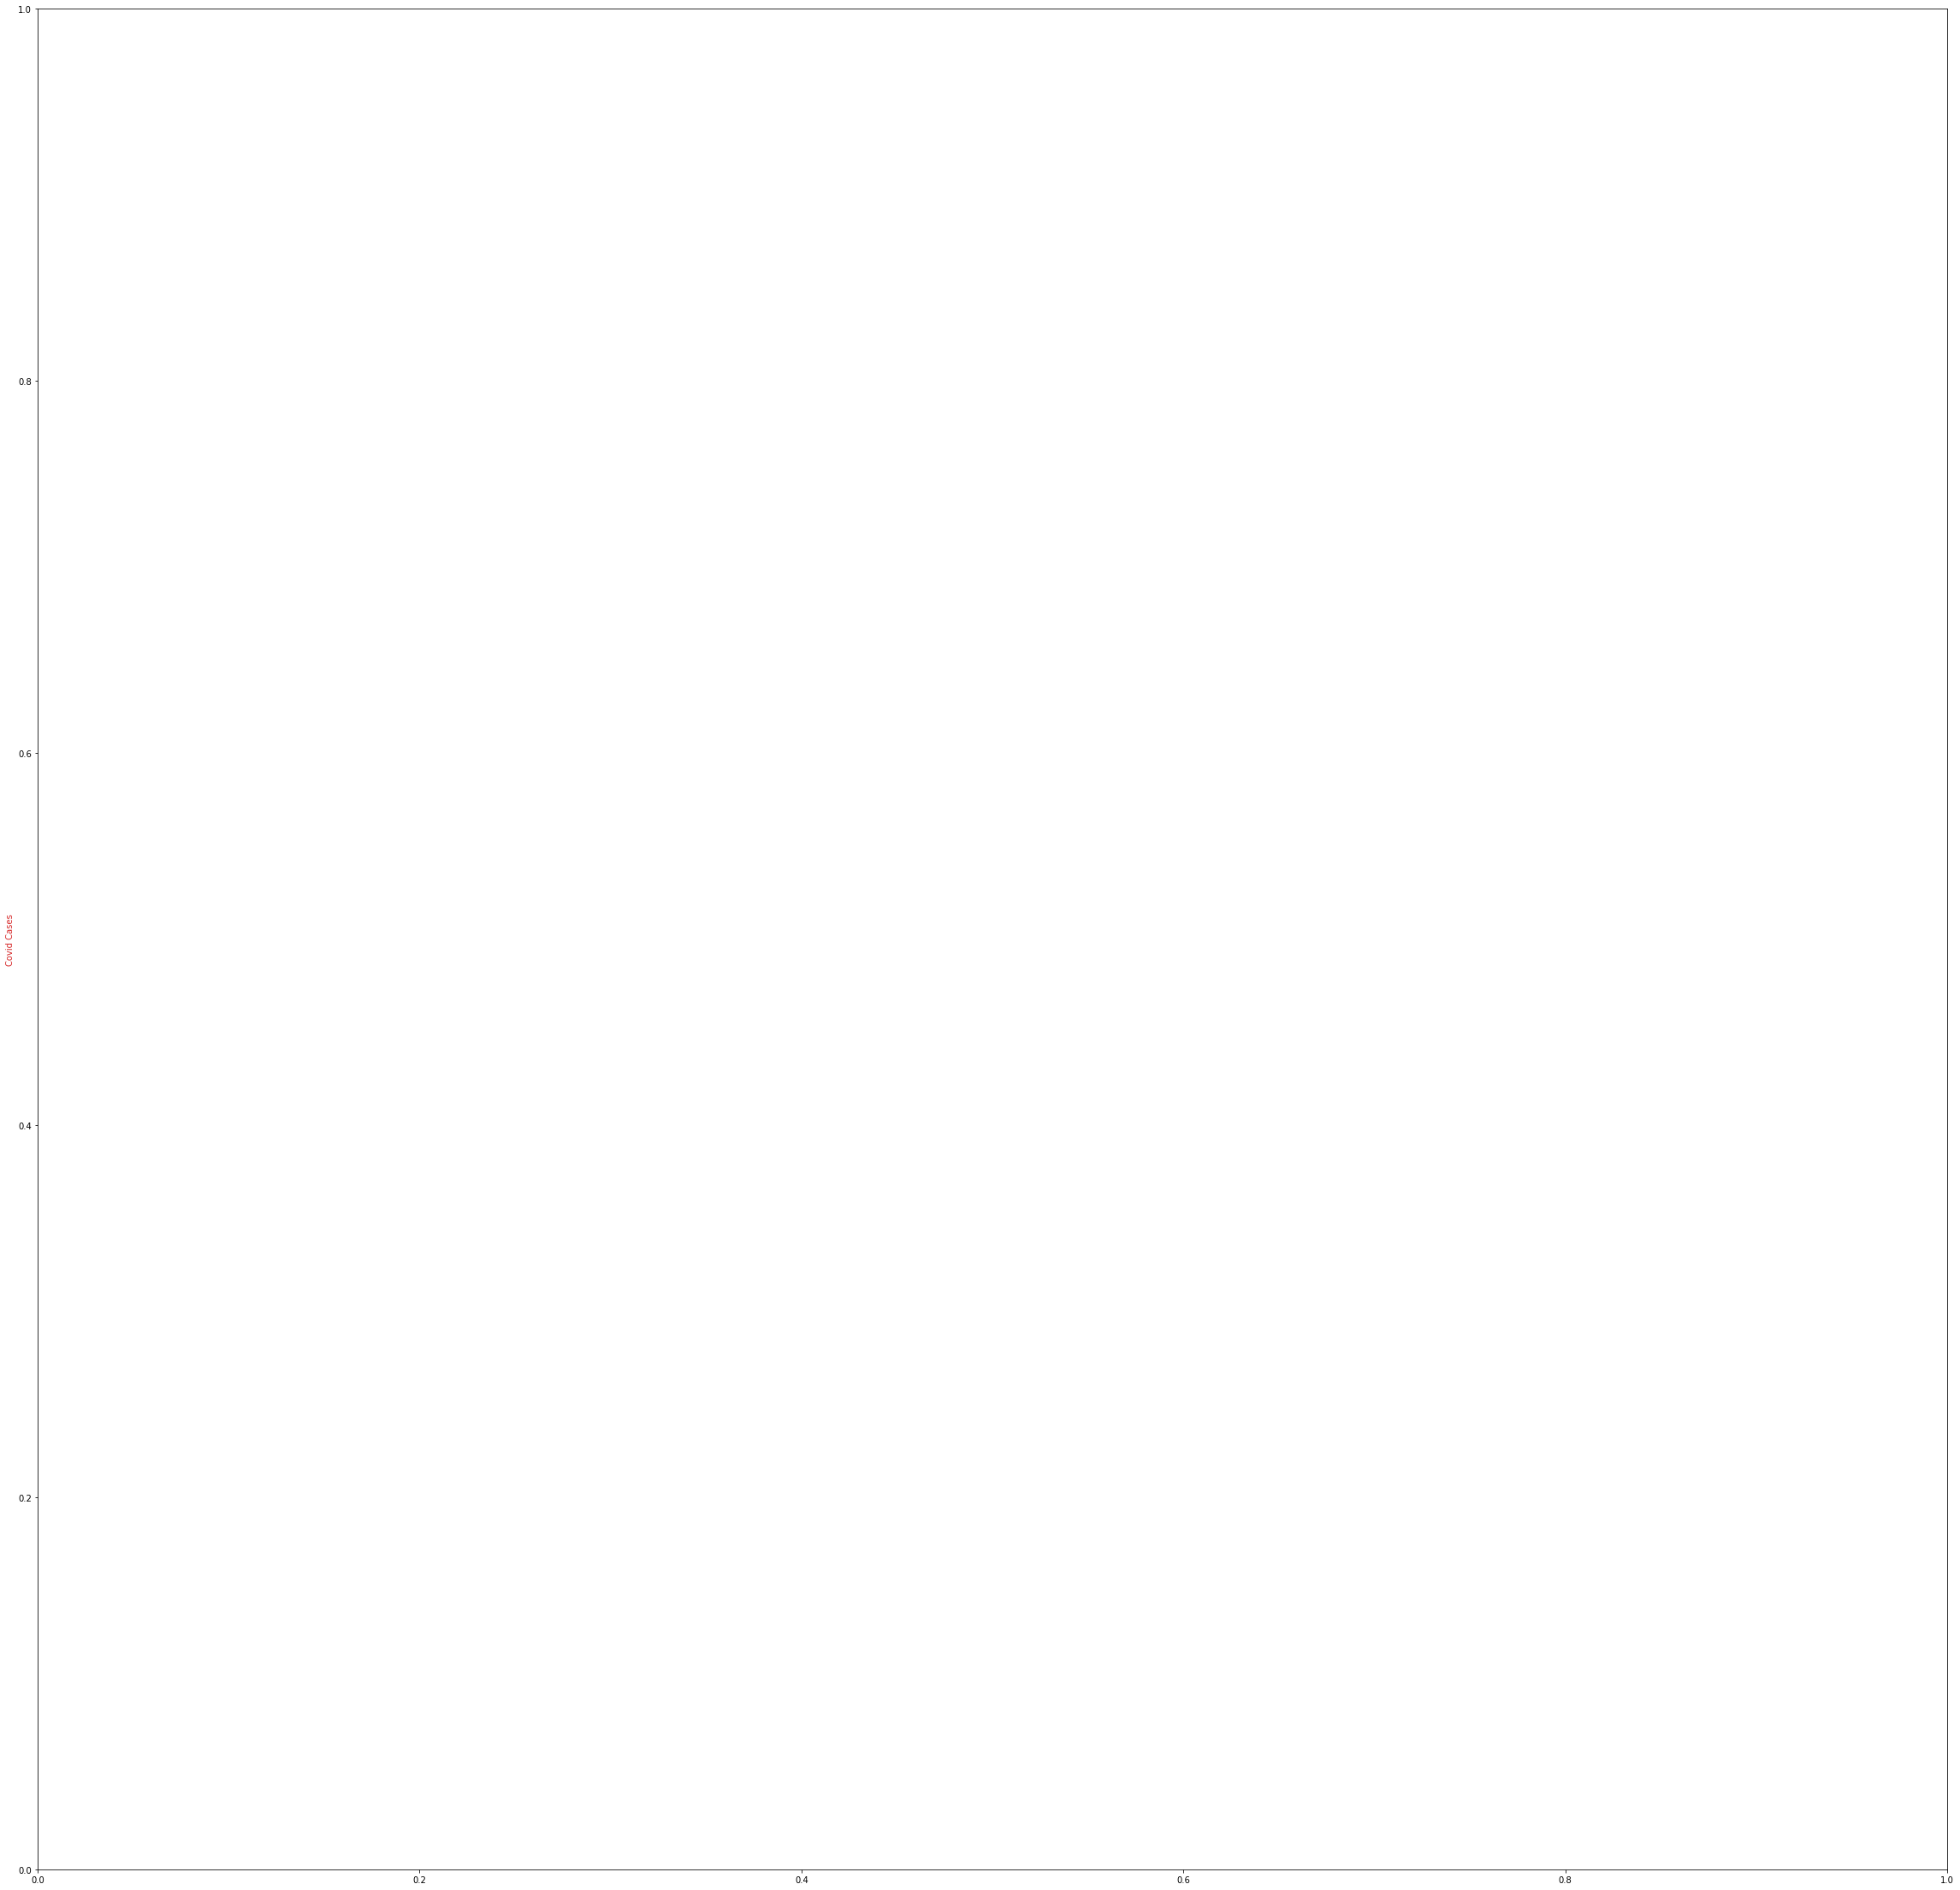

In [10]:
#plt.plot(np.array(list(country_covid_cases.values())), np.array(list(country_healthcare_rating.values())),'black')



import matplotlib.pyplot as plt
# plt.figure(figsize=(200,200))
# plt.xticks(size = 25)
# plt.yticks(size = 60)
# plt.plot(country_covid_cases.keys(), list(country_covid_cases.values()))
# plt.scatter(country_healthcare_rating.keys(),list(country_healthcare_rating.values()))
# plt.show()


fig, ax1 = plt.subplots(figsize=(40,40),)



color = 'tab:red'
ax1.set_ylabel('Covid Cases', color=color)
ax1.plot(list(country_covid_cases.keys()), list(country_covid_cases.values()), color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(size = 5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Country HealthCare Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(list(country_healthcare_rating.keys()), list(country_healthcare_rating.values()), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(size = 5)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# print("Countries with Highest Covid Cases")

index = 0;
for i in highest_covid:
    if index == 5:
        
        
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

print("Countries with Highest Swine Flu Cases")

index = 0;
for i in highest_h1n1:
    if index == 5:
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

print("Countries with Worst Health Care Quality")

index = 0;
for i in lowest_healthcare:
    if index == 5:
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

print("Countries with Highest Pollution")

index = 0;
for i in highest_pollution:
    if index == 5:
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

As seen above, the United States tops both COVID and Swine Flu charts, even though not necessarily having bad healthcare quality or pollution. Nonetheless, the countries with the worst health care quality could definitely be investigated as potential hotspots, as they generally have high population density and lower standards of living, so some correlation may be warranted there. The pollution attribute seems contextually uncorrelated as first world countries such as Chile, Taiwan, and Poland rank high. Nonetheless, as seen with the United States, just because a country is a first world nation doesn't necessarily make a disease less likely to spread

In [11]:
print(len(country_covid_cases))
print(len(country_pollution_rating))

191
80


kl: 2
Converged in: 4 iterations


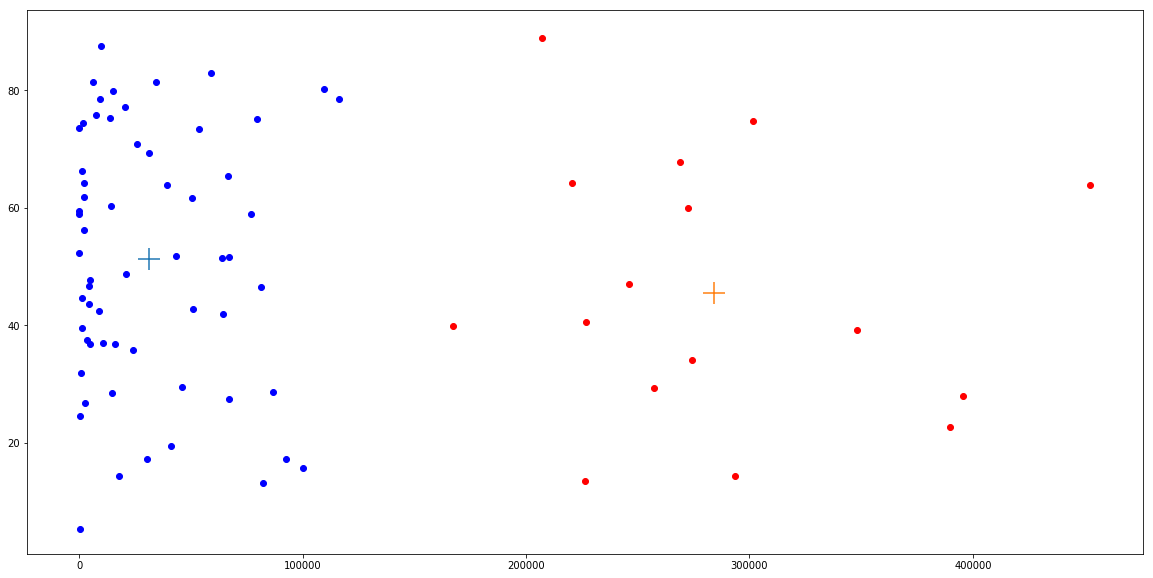

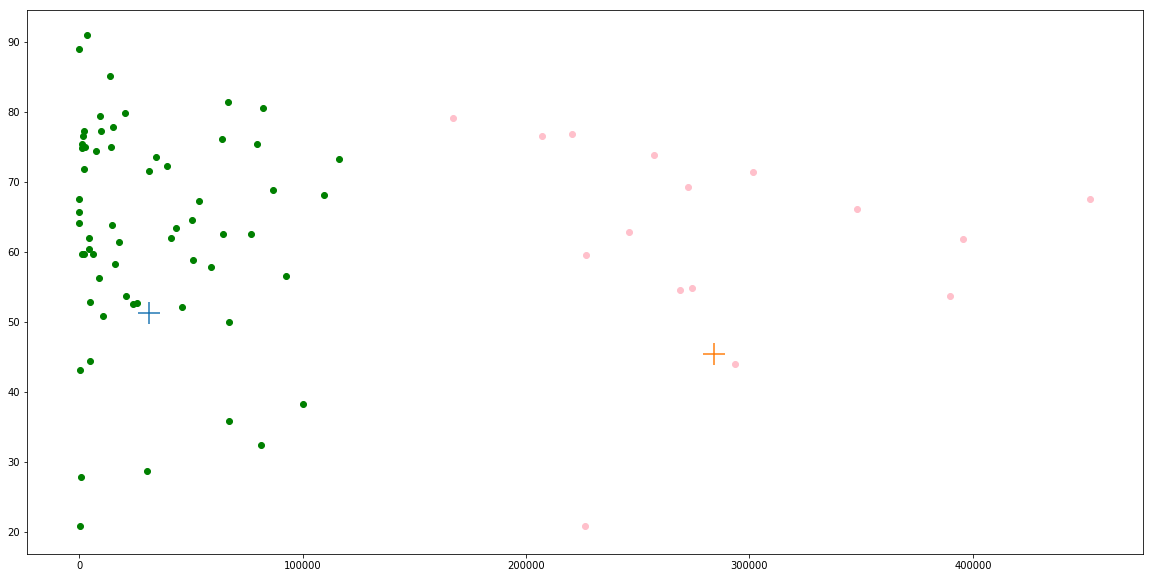

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from mpl_toolkits import mplot3d
from kneed import KneeLocator

# Healthcare
covidAndHealthcare = {}
for cN in country_covid_cases.keys():
    if cN in country_healthcare_rating.keys():
        covidAndHealthcare[cN] = [country_covid_cases[cN],country_healthcare_rating[cN]]

# Pollution
covidAndPollution = {}
for cN in country_covid_cases.keys():
    if cN in country_pollution_rating.keys():
        covidAndPollution[cN] = [country_covid_cases[cN],country_pollution_rating[cN]]

# Quality of Life
covidAndQOL = {}
for cN in country_covid_cases.keys():
    if cN in country_qualityOfLife_rating.keys():
        covidAndQOL[cN] = [country_covid_cases[cN],country_qualityOfLife_rating[cN]]
        
# Healthcare & Pollution
covidAndPollutionAndHealthcare = {}
for cN in country_covid_cases.keys():
    if cN in country_pollution_rating.keys() and cN in country_healthcare_rating.keys():
        covidAndPollutionAndHealthcare[cN] = [country_pollution_rating[cN], country_covid_cases[cN], country_healthcare_rating[cN]]

# Remove outliers from healthcare        
outliers = []
for cN in covidAndHealthcare.keys():
    if covidAndHealthcare[cN][0] > 500000: # Covid Cases over 500,000
        outliers.append(cN)
    elif covidAndHealthcare[cN][1] < 1: # Countries without healthcare rating
        outliers.append(cN)
for cN in outliers:
    covidAndHealthcare.pop(cN)
    
# Remove outliers from Quality of Life        
outliers = []
for cN in covidAndQOL.keys():
    if covidAndQOL[cN][0] > 500000: # Covid Cases over 500,000
        outliers.append(cN)
    elif covidAndQOL[cN][1] < 1: # Countries without healthcare rating
        outliers.append(cN)
for cN in outliers:
    covidAndQOL.pop(cN)
    
# Remove outliers from Pollution
outliers = []
for cN in covidAndPollution.keys():
    if covidAndPollution[cN][0] > 500000: # Covid cases over 500,000
        outliers.append(cN)
    elif covidAndPollution[cN][1] < 1: # Countries without pollution reported
        outliers.append(cN)
for cN in outliers:
    covidAndPollution.pop(cN)
    
# Remove outliers from Healthcare & Pollution
outliers = []
for cN in covidAndPollutionAndHealthcare.keys():
    if covidAndPollutionAndHealthcare[cN][1] > 500000: # Covid cases over 500,000
        outliers.append(cN)
    elif covidAndPollutionAndHealthcare[cN][0] < 1: # Countries without pollution reported
        outliers.append(cN)
    elif covidAndPollutionAndHealthcare[cN][2] < 1: # Countries without healthcare rating
        outliers.append(cN)
for cN in outliers:
    covidAndPollutionAndHealthcare.pop(cN)

# Store values from dictionaries for clustering
X = np.array(list(covidAndHealthcare.values()))
X2 = np.array(list(covidAndPollution.values()))
X3 = np.array(list(covidAndPollutionAndHealthcare.values()))
X4 = np.array(list(covidAndQOL.values()))

#DBSCAN
# clustering = DBSCAN(eps=2, min_samples=2).fit(X)
# clustering = DBSCAN(eps=k, min_samples=2).fit(X)
# clusterLabels = clustering.labels_
# print(clusterLabels)

# kmeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
    kmeans.fit(X2)
    sse.append(kmeans.inertia_)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("kl:",kl.elbow)
    
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
# kmeans.fit(X)
kmeans.fit(X4)
# kmeans.fit(X3)
cluster_centers = kmeans.cluster_centers_

kmeansLabels = kmeans.labels_
print("Converged in:",kmeans.n_iter_,"iterations")


# Assign to clusters
cluster1 = []
cluster2 = []
cluster11 = []
cluster22 = []
# cluster3 = []
# cluster4 = []
# for i in range(len(kmeansLabels)):
#     if kmeansLabels[i] == 0:
#         cluster1.append([X3[i][0],X3[i][1],X3[i][2]])
#     elif kmeansLabels[i] == 1:
#         cluster2.append([X3[i][0],X3[i][1],X3[i][2]])
#     elif kmeansLabels[i] == 2:
#         cluster3.append([X3[i][0],X3[i][1],X3[i][2]])        
#     elif kmeansLabels[i] == 3:
#         cluster4.append([X3[i][0],X3[i][1],X3[i][2]])
for i in range(len(kmeansLabels)):
    if kmeansLabels[i] == 0:
        cluster1.append([X4[i][0],X4[i][1]]) #covidAndQOL
        cluster11.append([X[i][0],X[i][1]]) #covidAndHealthcare
    elif kmeansLabels[i] == 1:
        cluster2.append([X4[i][0],X4[i][1]]) #covidAndQOL
        cluster22.append([X[i][0],X[i][1]]) #covidAndHealthcare
    elif kmeansLabels[i] == 2:
        cluster3.append([X4[i][0],X4[i][1]]) 
    elif kmeansLabels[i] == 3:
        cluster4.append([X4[i][0],X4[i][1]])
        
        
        
cluster1 = np.array(cluster1) #covidAndQOL
cluster2 = np.array(cluster2) #covidAndQOL

cluster11 = np.array(cluster11) #covidAndHealthcare
cluster22 = np.array(cluster22) #covidAndHealthcare
# cluster3 = np.array(cluster3)
# cluster4 = np.array(cluster4)

fig, ax = plt.subplots(figsize=(20,10))
for c in cluster_centers: #covidAndQOL
    ax.scatter(c[0],c[1],marker = "+",s=500)
ax.scatter(cluster1[:,0],cluster1[:,1],color="blue")
ax.scatter(cluster2[:,0],cluster2[:,1],color="red")
# ax.scatter(cluster3[:,0],cluster3[:,1],color="green")
# ax.scatter(cluster4[:,0],cluster4[:,1],color="orange")

fig, ax = plt.subplots(figsize=(20,10))
for cc in cluster_centers: #covidAndHealthcare
    ax.scatter(cc[0],cc[1],marker = "+",s=500)
ax.scatter(cluster11[:,0],cluster11[:,1],color="green")
ax.scatter(cluster22[:,0],cluster22[:,1],color="pink")

# # Creating figure
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")

# # ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], color = "green")
# for c in cluster_centers:
#     ax.scatter(c[0],c[1],c[2],marker = "+",s=500)
# ax.scatter3D(cluster1[:,0],cluster1[:,1],cluster1[:,2],color="blue")
# ax.scatter3D(cluster2[:,0],cluster2[:,1],cluster2[:,2],color="red")
# # ax.scatter3D(cluster3[:,0],cluster3[:,1],cluster3[:,2],color="green")
# # ax.scatter3D(cluster4[:,0],cluster4[:,1],cluster4[:,2],color="orange")
# plt.title("Country Pollution and Healthcare")
plt.show()

kl: 2
Converged in: 5 iterations


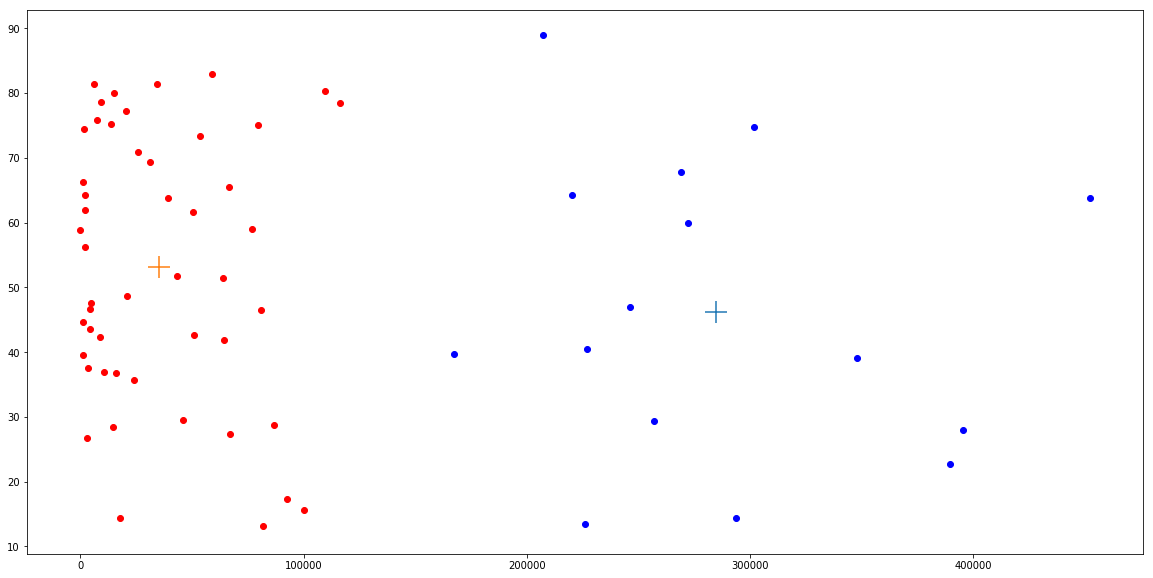

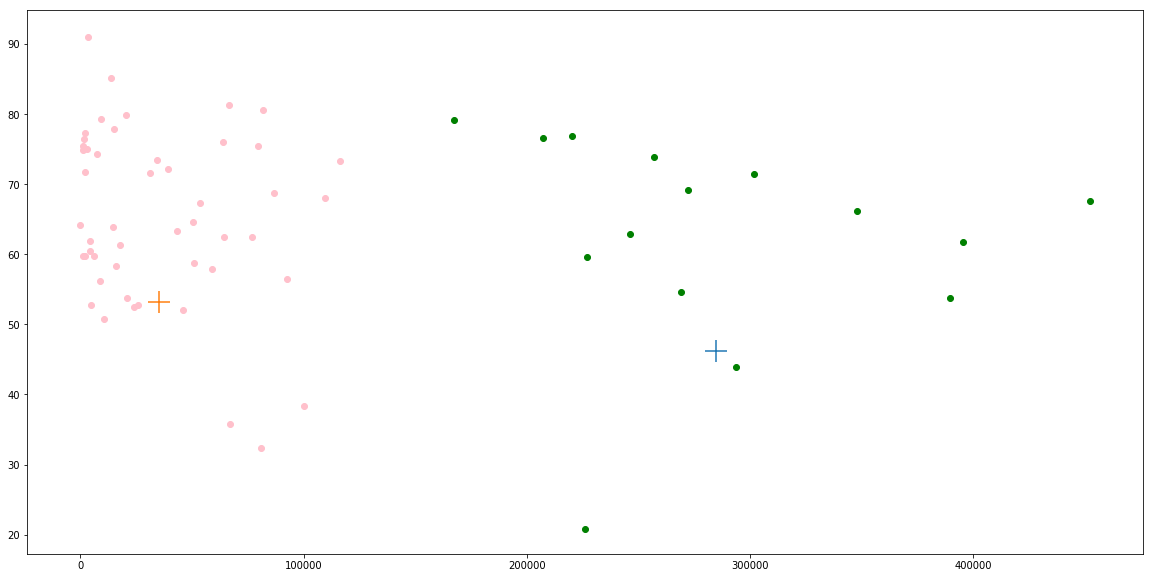

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from mpl_toolkits import mplot3d
from kneed import KneeLocator

# Healthcare
covidAndHealthcare = {}
for cN in country_h1n1_cases.keys():
    if cN in country_healthcare_rating.keys():
        covidAndHealthcare[cN] = [country_covid_cases[cN],country_healthcare_rating[cN]]

# Pollution
covidAndPollution = {}
for cN in country_h1n1_cases.keys():
    if cN in country_pollution_rating.keys():
        covidAndPollution[cN] = [country_covid_cases[cN],country_pollution_rating[cN]]

# Quality of Life
covidAndQOL = {}
for cN in country_h1n1_cases.keys():
    if cN in country_qualityOfLife_rating.keys():
        covidAndQOL[cN] = [country_covid_cases[cN],country_qualityOfLife_rating[cN]]
        
# Healthcare & Pollution
covidAndPollutionAndHealthcare = {}
for cN in country_h1n1_cases.keys():
    if cN in country_pollution_rating.keys() and cN in country_healthcare_rating.keys():
        covidAndPollutionAndHealthcare[cN] = [country_pollution_rating[cN], country_covid_cases[cN], country_healthcare_rating[cN]]

# Remove outliers from healthcare        
outliers = []
for cN in covidAndHealthcare.keys():
    if covidAndHealthcare[cN][0] > 500000: # Covid Cases over 500,000
        outliers.append(cN)
    elif covidAndHealthcare[cN][1] < 1: # Countries without healthcare rating
        outliers.append(cN)
for cN in outliers:
    covidAndHealthcare.pop(cN)
    
# Remove outliers from Quality of Life        
outliers = []
for cN in covidAndQOL.keys():
    if covidAndQOL[cN][0] > 500000: # Covid Cases over 500,000
        outliers.append(cN)
    elif covidAndQOL[cN][1] < 1: # Countries without healthcare rating
        outliers.append(cN)
for cN in outliers:
    covidAndQOL.pop(cN)
    
# Remove outliers from Pollution
outliers = []
for cN in covidAndPollution.keys():
    if covidAndPollution[cN][0] > 500000: # Covid cases over 500,000
        outliers.append(cN)
    elif covidAndPollution[cN][1] < 1: # Countries without pollution reported
        outliers.append(cN)
for cN in outliers:
    covidAndPollution.pop(cN)
    
# Remove outliers from Healthcare & Pollution
outliers = []
for cN in covidAndPollutionAndHealthcare.keys():
    if covidAndPollutionAndHealthcare[cN][1] > 500000: # Covid cases over 500,000
        outliers.append(cN)
    elif covidAndPollutionAndHealthcare[cN][0] < 1: # Countries without pollution reported
        outliers.append(cN)
    elif covidAndPollutionAndHealthcare[cN][2] < 1: # Countries without healthcare rating
        outliers.append(cN)
for cN in outliers:
    covidAndPollutionAndHealthcare.pop(cN)

# Store values from dictionaries for clustering
X = np.array(list(covidAndHealthcare.values()))
X2 = np.array(list(covidAndPollution.values()))
X3 = np.array(list(covidAndPollutionAndHealthcare.values()))
X4 = np.array(list(covidAndQOL.values()))

#DBSCAN
# clustering = DBSCAN(eps=2, min_samples=2).fit(X)
# clustering = DBSCAN(eps=k, min_samples=2).fit(X)
# clusterLabels = clustering.labels_
# print(clusterLabels)

# kmeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
    kmeans.fit(X2)
    sse.append(kmeans.inertia_)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("kl:",kl.elbow)
    
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
# kmeans.fit(X)
kmeans.fit(X4)
# kmeans.fit(X3)
cluster_centers = kmeans.cluster_centers_

kmeansLabels = kmeans.labels_
print("Converged in:",kmeans.n_iter_,"iterations")


# Assign to clusters
cluster1 = []
cluster2 = []
cluster11 = []
cluster22 = []
# cluster3 = []
# cluster4 = []
# for i in range(len(kmeansLabels)):
#     if kmeansLabels[i] == 0:
#         cluster1.append([X3[i][0],X3[i][1],X3[i][2]])
#     elif kmeansLabels[i] == 1:
#         cluster2.append([X3[i][0],X3[i][1],X3[i][2]])
#     elif kmeansLabels[i] == 2:
#         cluster3.append([X3[i][0],X3[i][1],X3[i][2]])        
#     elif kmeansLabels[i] == 3:
#         cluster4.append([X3[i][0],X3[i][1],X3[i][2]])
for i in range(len(kmeansLabels)):
    if kmeansLabels[i] == 0:
        cluster1.append([X4[i][0],X4[i][1]]) #covidAndQOL
        cluster11.append([X[i][0],X[i][1]]) #covidAndHealthcare
    elif kmeansLabels[i] == 1:
        cluster2.append([X4[i][0],X4[i][1]]) #covidAndQOL
        cluster22.append([X[i][0],X[i][1]]) #covidAndHealthcare
    elif kmeansLabels[i] == 2:
        cluster3.append([X4[i][0],X4[i][1]]) 
    elif kmeansLabels[i] == 3:
        cluster4.append([X4[i][0],X4[i][1]])
        
        
        
cluster1 = np.array(cluster1) #covidAndQOL
cluster2 = np.array(cluster2) #covidAndQOL

cluster11 = np.array(cluster11) #covidAndHealthcare
cluster22 = np.array(cluster22) #covidAndHealthcare
# cluster3 = np.array(cluster3)
# cluster4 = np.array(cluster4)

fig, ax = plt.subplots(figsize=(20,10))
for c in cluster_centers: #covidAndQOL
    ax.scatter(c[0],c[1],marker = "+",s=500)
ax.scatter(cluster1[:,0],cluster1[:,1],color="blue")
ax.scatter(cluster2[:,0],cluster2[:,1],color="red")
# ax.scatter(cluster3[:,0],cluster3[:,1],color="green")
# ax.scatter(cluster4[:,0],cluster4[:,1],color="orange")

fig, ax = plt.subplots(figsize=(20,10))
for cc in cluster_centers: #covidAndHealthcare
    ax.scatter(cc[0],cc[1],marker = "+",s=500)
ax.scatter(cluster11[:,0],cluster11[:,1],color="green")
ax.scatter(cluster22[:,0],cluster22[:,1],color="pink")

# # Creating figure
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")

# # ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], color = "green")
# for c in cluster_centers:
#     ax.scatter(c[0],c[1],c[2],marker = "+",s=500)
# ax.scatter3D(cluster1[:,0],cluster1[:,1],cluster1[:,2],color="blue")
# ax.scatter3D(cluster2[:,0],cluster2[:,1],cluster2[:,2],color="red")
# # ax.scatter3D(cluster3[:,0],cluster3[:,1],cluster3[:,2],color="green")
# # ax.scatter3D(cluster4[:,0],cluster4[:,1],cluster4[:,2],color="orange")
# plt.title("Country Pollution and Healthcare")
plt.show()

### Cross Validation for Feature Extraction

In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree


# country_healthcare_rating = {}
# country_pollution_rating = {}
# country_qualityOfLife_rating = {}
# country_Movehub_rating = {}
# country_Purachase_power = {}
# country_Crime_rating = {}

# X, y  = np.array(dfTrain[dfTrain.columns[:-2]]), np.array(dfTrain['Yield'])

num_folds = 10

linearModel = LinearRegression()
gbModel = GradientBoostingRegressor(random_state=0)
rfModel = RandomForestRegressor()
bagging = BaggingRegressor()
adaMod = AdaBoostRegressor()
decTree = tree.DecisionTreeRegressor()
vote = VotingRegressor(estimators=[('gb', gbModel), ('rf', rfModel), ('br', bagging), ('ad',adaMod)])

kf = KFold(n_splits=num_folds)

allFeatures = {}

# Healthcare
vals = {}
cases = {}
for cN in country_covid_cases.keys():
    if cN in country_pollution_rating.keys():
        vals[cN] = country_covid_cases[cN]
        cases[cN] = country_pollution_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures['Healthcare Rating'] = [X,y]

# Pollution
vals = {}
cases = {}
for cN in country_covid_cases.keys():
    if cN in country_healthcare_rating.keys():
        vals[cN] = country_covid_cases[cN]
        cases[cN] = country_healthcare_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures['Pollution Rating'] = [X,y]

# Quality of Life
vals = {}
cases = {}
for cN in country_covid_cases.keys():
    if cN in country_qualityOfLife_rating.keys():
        vals[cN] = country_covid_cases[cN]
        cases[cN] = country_qualityOfLife_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures['Quality of Life'] = [X,y]

# Movehub Rating
vals = {}
cases = {}
for cN in country_covid_cases.keys():
    if cN in country_Movehub_rating.keys():
        vals[cN] = country_covid_cases[cN]
        cases[cN] = country_Movehub_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures['Movehub Rating'] = [X,y]

# Purachase Power
vals = {}
cases = {}
for cN in country_covid_cases.keys():
    if cN in country_Purachase_power.keys():
        vals[cN] = country_covid_cases[cN]
        cases[cN] = country_Purachase_power[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures['Purchase Power'] = [X,y]

# Crime Rating
vals = {}
cases = {}
for cN in country_covid_cases.keys():
    if cN in country_Crime_rating.keys():
        vals[cN] = country_covid_cases[cN]
        cases[cN] = country_Crime_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures['Crime Rating'] = [X,y]

for featureName in allFeatures.keys():
    X,y = allFeatures[featureName][0],allFeatures[featureName][1]
    linRegResults = []
    gbRegResults = []
    rfRegResults = []
    baggingResults = []
    adaRegResults = []
    decTreeResults = []
    voteResults = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        linearModel.fit(X_train, y_train)
        gbModel.fit(X_train, y_train.ravel())
        rfModel.fit(X_train, y_train.ravel())
        bagging.fit(X_train, y_train.ravel())
        adaMod.fit(X_train, y_train.ravel())
        decTree.fit(X_train, y_train)
        vote.fit(X_train, y_train.ravel())
        linRegResults.append(mean_squared_error(y_test, linearModel.predict(X_test)))
        gbRegResults.append(mean_squared_error(y_test, gbModel.predict(X_test)))
        rfRegResults.append(mean_squared_error(y_test, rfModel.predict(X_test)))
        baggingResults.append(mean_squared_error(y_test, bagging.predict(X_test)))
        adaRegResults.append(mean_squared_error(y_test, adaMod.predict(X_test)))
        decTreeResults.append(mean_squared_error(y_test, decTree.predict(X_test)))
        voteResults.append(mean_squared_error(y_test, vote.predict(X_test)))
    print(featureName,"Linear Regression Error:",np.mean(linRegResults))
    print(featureName,"Gradient Boost Error:",np.mean(gbRegResults))
    print(featureName,"Random Forest Error:",np.mean(rfRegResults))
    print(featureName,"Bagging Error:",np.mean(baggingResults))
    print(featureName,"Ada Boost Error:",np.mean(adaRegResults))
    print(featureName,"Decision Tree Error:",np.mean(decTreeResults))
    print(featureName,"Vote Error:",np.mean(voteResults))
    print("--------------------------------")

Healthcare Rating Linear Regression Error: 546.9243317851525
Healthcare Rating Gradient Boost Error: 789.9802352995944
Healthcare Rating Random Forest Error: 774.569182669246
Healthcare Rating Bagging Error: 812.1548767932734
Healthcare Rating Ada Boost Error: 620.202851988329
Healthcare Rating Decision Tree Error: 1012.3505800644546
Healthcare Rating Vote Error: 690.6437201385917
--------------------------------
Pollution Rating Linear Regression Error: 1183.9066471818303
Pollution Rating Gradient Boost Error: 1179.0291324737136
Pollution Rating Random Forest Error: 1310.0091810506688
Pollution Rating Bagging Error: 1313.7586129711347
Pollution Rating Ada Boost Error: 880.3253690980549
Pollution Rating Decision Tree Error: 1702.6919521511488
Pollution Rating Vote Error: 1135.6838927544607
--------------------------------
Quality of Life Linear Regression Error: 463.7128572359954
Quality of Life Gradient Boost Error: 674.0432139768093
Quality of Life Random Forest Error: 682.4052050857

In [15]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree


# country_healthcare_rating = {}
# country_pollution_rating = {}
# country_qualityOfLife_rating = {}
# country_Movehub_rating = {}
# country_Purachase_power = {}
# country_Crime_rating = {}

# X, y  = np.array(dfTrain[dfTrain.columns[:-2]]), np.array(dfTrain['Yield'])

num_folds = 10

linearModel = LinearRegression()
gbModel = GradientBoostingRegressor(random_state=0)
rfModel = RandomForestRegressor()
bagging = BaggingRegressor()
adaMod = AdaBoostRegressor()
decTree = tree.DecisionTreeRegressor()
vote = VotingRegressor(estimators=[('gb', gbModel), ('rf', rfModel), ('br', bagging), ('ad',adaMod)])

kf = KFold(n_splits=num_folds)

allFeatures2 = {}

# Healthcare
vals = {}
cases = {}
for cN in country_h1n1_cases.keys():
    if cN in country_pollution_rating.keys():
        vals[cN] = country_h1n1_cases[cN]
        cases[cN] = country_pollution_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures2['Healthcare Rating'] = [X,y]

# Pollution
vals = {}
cases = {}
for cN in country_h1n1_cases.keys():
    if cN in country_healthcare_rating.keys():
        vals[cN] = country_h1n1_cases[cN]
        cases[cN] = country_healthcare_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures2['Pollution Rating'] = [X,y]

# Quality of Life
vals = {}
cases = {}
for cN in country_h1n1_cases.keys():
    if cN in country_qualityOfLife_rating.keys():
        vals[cN] = country_h1n1_cases[cN]
        cases[cN] = country_qualityOfLife_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures2['Quality of Life'] = [X,y]

# Movehub Rating
vals = {}
cases = {}
for cN in country_h1n1_cases.keys():
    if cN in country_Movehub_rating.keys():
        vals[cN] = country_h1n1_cases[cN]
        cases[cN] = country_Movehub_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures2['Movehub Rating'] = [X,y]

# Purachase Power
vals = {}
cases = {}
for cN in country_h1n1_cases.keys():
    if cN in country_Purachase_power.keys():
        vals[cN] = country_h1n1_cases[cN]
        cases[cN] = country_Purachase_power[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures2['Purchase Power'] = [X,y]

# Crime Rating
vals = {}
cases = {}
for cN in country_h1n1_cases.keys():
    if cN in country_Crime_rating.keys():
        vals[cN] = country_h1n1_cases[cN]
        cases[cN] = country_Crime_rating[cN]
X, y = np.array(list(vals.values())).reshape(-1, 1), np.array(list(cases.values())).reshape(-1, 1)
allFeatures2['Crime Rating'] = [X,y]

for featureName in allFeatures2.keys():
    X,y = allFeatures2[featureName][0],allFeatures2[featureName][1]
    linRegResults = []
    gbRegResults = []
    rfRegResults = []
    baggingResults = []
    adaRegResults = []
    decTreeResults = []
    voteResults = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        linearModel.fit(X_train, y_train)
        gbModel.fit(X_train, y_train.ravel())
        rfModel.fit(X_train, y_train.ravel())
        bagging.fit(X_train, y_train.ravel())
        adaMod.fit(X_train, y_train.ravel())
        decTree.fit(X_train, y_train)
        vote.fit(X_train, y_train.ravel())
        linRegResults.append(mean_squared_error(y_test, linearModel.predict(X_test)))
        gbRegResults.append(mean_squared_error(y_test, gbModel.predict(X_test)))
        rfRegResults.append(mean_squared_error(y_test, rfModel.predict(X_test)))
        baggingResults.append(mean_squared_error(y_test, bagging.predict(X_test)))
        adaRegResults.append(mean_squared_error(y_test, adaMod.predict(X_test)))
        decTreeResults.append(mean_squared_error(y_test, decTree.predict(X_test)))
        voteResults.append(mean_squared_error(y_test, vote.predict(X_test)))
    print(featureName,"Linear Regression Error:",np.mean(linRegResults))
    print(featureName,"Gradient Boost Error:",np.mean(gbRegResults))
    print(featureName,"Random Forest Error:",np.mean(rfRegResults))
    print(featureName,"Bagging Error:",np.mean(baggingResults))
    print(featureName,"Ada Boost Error:",np.mean(adaRegResults))
    print(featureName,"Decision Tree Error:",np.mean(decTreeResults))
    print(featureName,"Vote Error:",np.mean(voteResults))
    print("--------------------------------")

Healthcare Rating Linear Regression Error: 636.1591470197637
Healthcare Rating Gradient Boost Error: 915.9265750128501
Healthcare Rating Random Forest Error: 708.5640877480614
Healthcare Rating Bagging Error: 741.1984647536785
Healthcare Rating Ada Boost Error: 735.0318464483078
Healthcare Rating Decision Tree Error: 1048.049344500613
Healthcare Rating Vote Error: 738.741896907845
--------------------------------
Pollution Rating Linear Regression Error: 1097.7730727663518
Pollution Rating Gradient Boost Error: 1101.7299957536484
Pollution Rating Random Forest Error: 1041.2733238397032
Pollution Rating Bagging Error: 1039.479866303682
Pollution Rating Ada Boost Error: 863.5994705288967
Pollution Rating Decision Tree Error: 1329.9046960180744
Pollution Rating Vote Error: 967.1156369251424
--------------------------------
Quality of Life Linear Regression Error: 485.8565797157178
Quality of Life Gradient Boost Error: 835.3066582340629
Quality of Life Random Forest Error: 735.719475456977

In [16]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Healthcare & Pollution & QOL
HPQOL = {}
covidLevels = {}
for cN in country_covid_cases.keys():
    if cN in country_pollution_rating.keys() and cN in country_healthcare_rating.keys() and cN in country_qualityOfLife_rating.keys():
        covidLevels[cN] = [country_covid_cases[cN]]
        covidAndPollutionAndHealthcare[cN] = [country_healthcare_rating[cN],country_pollution_rating[cN],country_qualityOfLife_rating[cN]]


features = np.array(list(covidAndPollutionAndHealthcare.values()))
y_train = np.array(list(covidLevels.values()))
# print(features.shape)
# print(y_train.ravel())
X_t, X_test, y_t, y_test = train_test_split(features, y_train, test_size=0.2, random_state = 5622)

gbModel = GradientBoostingRegressor(random_state=0)
rfModel = RandomForestRegressor()
bagging = BaggingRegressor()
adaMod = AdaBoostRegressor()
clf = tree.DecisionTreeRegressor()
vote = VotingRegressor(estimators=[('gb', gbModel), ('rf', rfModel), ('br', bagging), ('ad',adaMod)])

rfModel.fit(X_t, y_t.ravel())
gbModel.fit(X_t, y_t.ravel())
bagging.fit(X_t, y_t.ravel())
adaMod.fit(X_t,y_t.ravel())
clf.fit(X_t, y_t)
vote.fit(X_t, y_t.ravel())


print("Random Forest:",mean_squared_error(y_test, rfModel.predict(X_test)))
print("Gradient Boost:",mean_squared_error(y_test, gbModel.predict(X_test)))
print("Bagging:",mean_squared_error(y_test, bagging.predict(X_test)))
print("AdaBoost:",mean_squared_error(y_test, adaMod.predict(X_test)))
print("Vote:",mean_squared_error(y_test, vote.predict(X_test)))
print("Decision Tree:",mean_squared_error(y_test, clf.predict(X_test)))

Random Forest: 404323987035.67554
Gradient Boost: 448249781848.604
Bagging: 417565123086.8244
AdaBoost: 394093059152.7184
Vote: 406611803206.15814
Decision Tree: 410912667948.3125


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


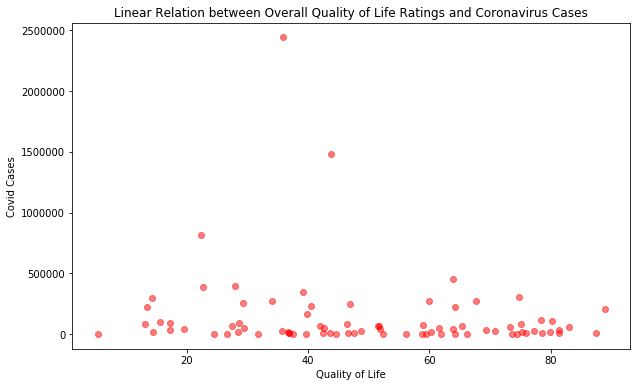

In [17]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(allFeatures['Quality of Life'][1],allFeatures['Quality of Life'][0], color='red', alpha = 0.5)
ax.set_xlabel("Quality of Life")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Quality of Life Ratings and Coronavirus Cases")
plt.legend()
plt.show()

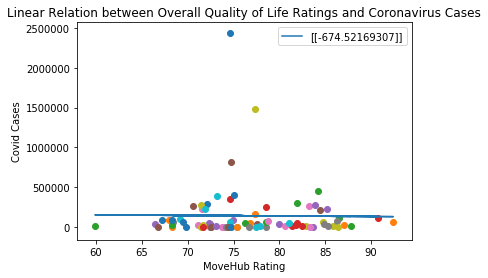

In [18]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures["Movehub Rating"][1], allFeatures["Movehub Rating"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures["Movehub Rating"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures["Movehub Rating"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures["Movehub Rating"][1][i], allFeatures["Movehub Rating"][0][i]);
ax.set_xlabel("MoveHub Rating")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Quality of Life Ratings and Coronavirus Cases")
plt.legend()
plt.show()

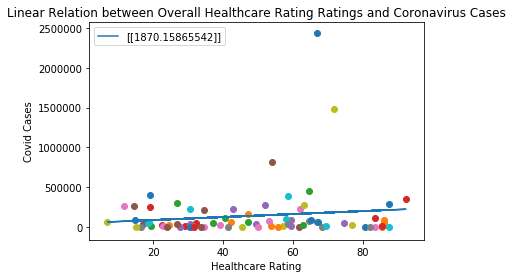

In [19]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures["Healthcare Rating"][1], allFeatures["Healthcare Rating"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures["Healthcare Rating"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures["Healthcare Rating"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures["Healthcare Rating"][1][i], allFeatures["Healthcare Rating"][0][i]);
ax.set_xlabel("Healthcare Rating")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Healthcare Rating Ratings and Coronavirus Cases")
plt.legend()
plt.show()

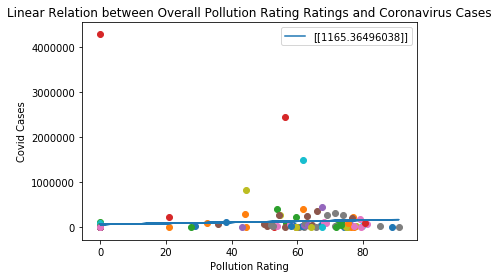

In [20]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures["Pollution Rating"][1], allFeatures["Pollution Rating"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures["Pollution Rating"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures["Pollution Rating"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures["Pollution Rating"][1][i], allFeatures["Pollution Rating"][0][i]);
ax.set_xlabel("Pollution Rating")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Pollution Rating Ratings and Coronavirus Cases")
plt.legend()
plt.show()

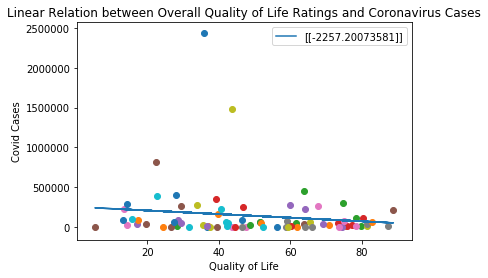

In [21]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures["Quality of Life"][1], allFeatures["Quality of Life"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures["Quality of Life"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures["Quality of Life"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures["Quality of Life"][1][i], allFeatures["Quality of Life"][0][i]);
ax.set_xlabel("Quality of Life")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Quality of Life Ratings and Coronavirus Cases")
plt.legend()
plt.show()

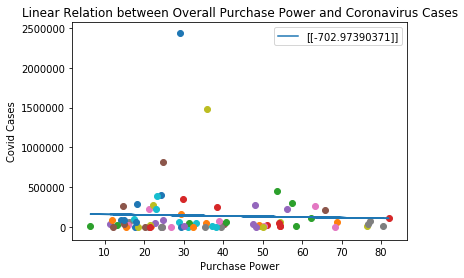

In [22]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures["Purchase Power"][1], allFeatures["Purchase Power"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures["Purchase Power"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures["Purchase Power"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures["Purchase Power"][1][i], allFeatures["Purchase Power"][0][i]);
ax.set_xlabel("Purchase Power")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Purchase Power and Coronavirus Cases")
plt.legend()
plt.show()

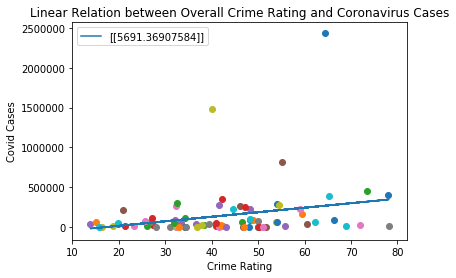

In [23]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures["Crime Rating"][1], allFeatures["Crime Rating"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures["Crime Rating"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures["Crime Rating"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures["Crime Rating"][1][i], allFeatures["Crime Rating"][0][i]);
ax.set_xlabel("Crime Rating")
ax.set_ylabel("Covid Cases")
ax.set_title("Linear Relation between Overall Crime Rating and Coronavirus Cases")
plt.legend()
plt.show()

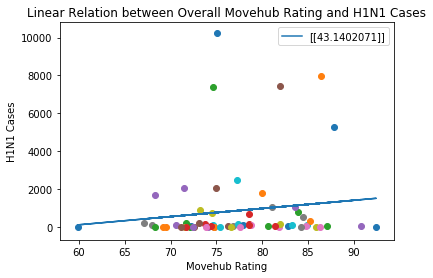

In [32]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures2["Movehub Rating"][1], allFeatures2["Movehub Rating"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures2["Movehub Rating"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures2["Movehub Rating"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures2["Movehub Rating"][1][i], allFeatures2["Movehub Rating"][0][i]);
ax.set_xlabel("Movehub Rating")
ax.set_ylabel("H1N1 Cases")
ax.set_title("Linear Relation between Overall Movehub Rating and H1N1 Cases")
plt.legend()
plt.show()

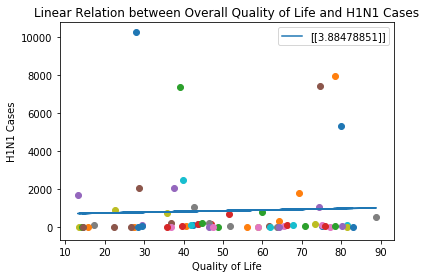

In [24]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures2["Quality of Life"][1], allFeatures2["Quality of Life"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures2["Quality of Life"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures2["Quality of Life"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures2["Quality of Life"][1][i], allFeatures2["Quality of Life"][0][i]);
ax.set_xlabel("Quality of Life")
ax.set_ylabel("H1N1 Cases")
ax.set_title("Linear Relation between Overall Quality of Life and H1N1 Cases")
plt.legend()
plt.show()

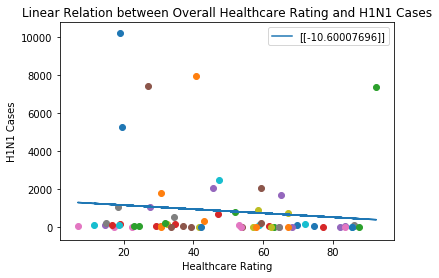

In [34]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression().fit(allFeatures2["Healthcare Rating"][1], allFeatures2["Healthcare Rating"][0]);
# print(allFeatures["Movehub Rating"][0])
# for x in allFeatures["Movehub Rating"][0]:
#     print(x[0])
reg_line = [reg_mod.predict([[x[0]]])[0][0] for x in allFeatures2["Healthcare Rating"][1]]

# print(reg_line)
fig, ax = plt.subplots()
plt.plot(allFeatures2["Healthcare Rating"][1], reg_line, label = reg_mod.coef_);
for i in range(len(reg_line)):
    plt.scatter(allFeatures2["Healthcare Rating"][1][i], allFeatures2["Healthcare Rating"][0][i]);
ax.set_xlabel("Healthcare Rating")
ax.set_ylabel("H1N1 Cases")
ax.set_title("Linear Relation between Overall Healthcare Rating and H1N1 Cases")
plt.legend()
plt.show()

In [25]:
import statsmodels.api as sm

ql = [x[0] for x in allFeatures2["Quality of Life"][1]]
hcr = [x[0] for x in allFeatures2["Healthcare Rating"][1]]
pr = [x[0] for x in allFeatures2["Pollution Rating"][1]]
cr = [x[0] for x in allFeatures2["Crime Rating"][1]]
print(f'{len(ql)},{len(hcr)},{len(pr)},{len(cr)}')

67,67,107,67


In [27]:
mh = [x[0] for x in allFeatures2["Movehub Rating"][1]]

X = np.array([mh, ql])
print(X.shape)

mlr_mod = sm.OLS(allFeatures2["Movehub Rating"][0], X.T).fit();
multi = mlr_mod.predict(X.T)
print(len(multi))
mlr_mod.summary()

(2, 67)
67


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.127
Method:                 Least Squares   F-statistic:                              5.890
Date:                Fri, 11 Dec 2020   Prob (F-statistic):                     0.00446
Time:                        09:42:53   Log-Likelihood:                         -606.03
No. Observations:                  67   AIC:                                      1216.
Df Residuals:                      65   BIC:                                      1220.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.0047     10.187      1.178      0.243      -8.341      32.350
x2            -1.0779     14.358     -0.075      0.940     -29.753      27.597
==============================================================================
Omnibus:                       66.661   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.541
Skew:                           3.132   Prob(JB):                     6.84e-75
Kurtosis:                      12.116   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

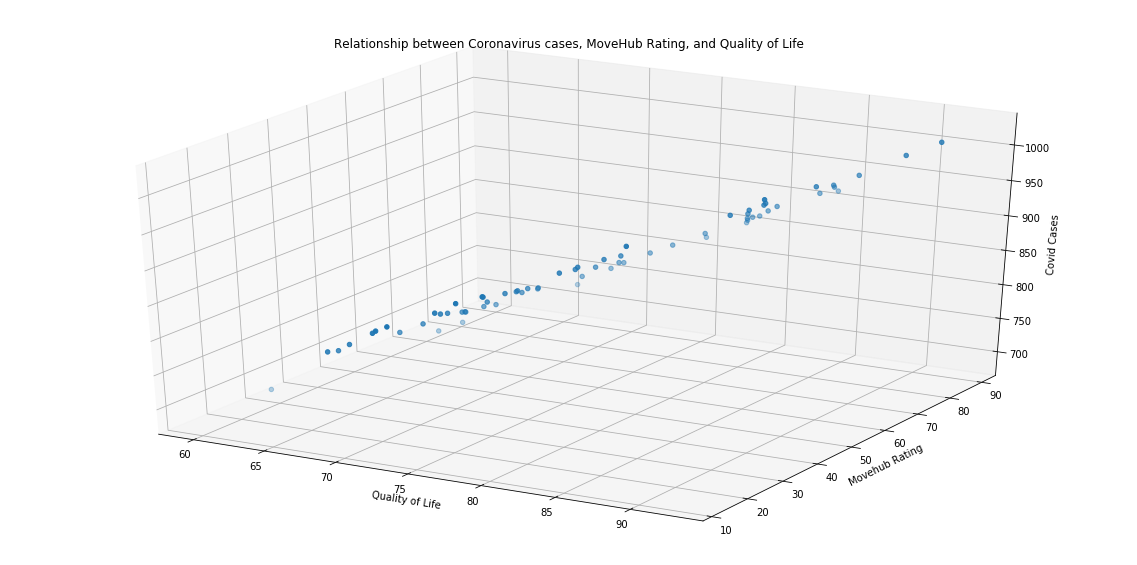

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = ax = fig.gca(projection='3d')
ax.scatter(mh, ql, multi);
ax.set_xlabel("Quality of Life")
ax.set_ylabel("Movehub Rating")
ax.set_zlabel("Covid Cases")
ax.set_title("Relationship between Coronavirus cases, MoveHub Rating, and Quality of Life")
plt.show()